Cross-validation scores: [0.851  0.4828 0.2464 0.3706 0.4996]
Average cross-validation score: 0.49008
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      8520
           1       0.57      0.11      0.19      1480

    accuracy                           0.86     10000
   macro avg       0.72      0.55      0.55     10000
weighted avg       0.82      0.86      0.81     10000

ROC-AUC Score: 0.7743073134754472


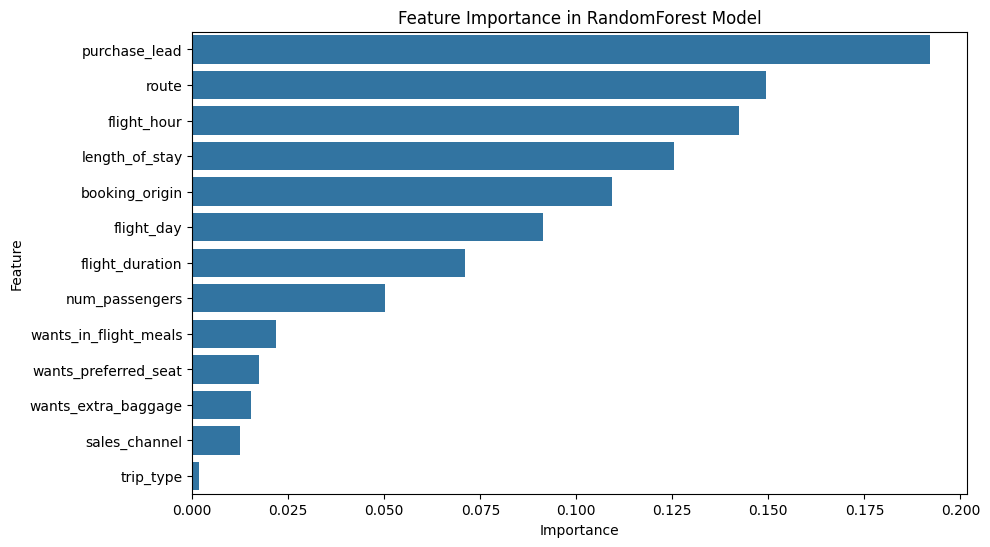

In [ ]:

# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import os

current_dir = os.getcwd()
file_path = os.path.join(current_dir, "customer_booking.csv")
df = pd.read_csv(file_path, encoding="ISO-8859-1")
df.head()

for column in df.select_dtypes(include=['object']).columns:
    label_encoder = LabelEncoder()
    df[column] = label_encoder.fit_transform(df[column])
# Feature selection and target variable
X = df.drop('booking_complete', axis=1)  # Features (drop the target column)
y = df['booking_complete']  # Target variable: 1 if booking made, 0 if not

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the RandomForest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5)
print(f'Cross-validation scores: {cv_scores}')
print(f'Average cross-validation score: {cv_scores.mean()}')

# Evaluate the model
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
print(f'ROC-AUC Score: {roc_auc}')

# Feature Importance Visualization
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance in RandomForest Model')
plt.show()

